## 5. Hypervectors with decay

The roll operation or the random orthogonal matrix has an important property defined by the eigenvalues. For roll or random orth matrices the eigenvalues are all 1, which means that the hypervector/rnn will attempt to store all information from all time. We have seen how the chaos will build up until no information can be stored. This means that the most recent input or the first input have the same likelihoods of being correctly read out. 

### 5.1 Maintaining the recent history in favor of the past

In the context of RNNs this is potentially harmful. This is because an RNN getting a continuous stream of input will fill up at some point, and chaos will dominate its dynamics instead of information. When this happens, even the most recent items added to the RNN will be undecodable. This means that the RNN has filled up, and it is over capacity.

A more useful RNN could have memory only for a finite amount of history. In this case, we could imagine the weight matrix having eigenvalue slightly less than 1, or we decay the hypervector by a small amount each time step. This type of decay will exponentially decrease the information energy in the hypervector, and should enable storage of recent sequences indefinitely, but perhaps at the cost of not being able to store quite as much.

We saw that the memory decayed exponentially due to interference as we filled up the hypervector. In order to have such a hypervector serve as memory for an extensive period of time, either the hypervector needs to be rest or the information in the hypervector can decay away.

Here I illustrate the decay technique and show that it is possible to store the recent history of the input sequence indefinitely in an RNN with this type of technique.


In [2]:
import random_idx
import utils
import pickle
import time
import string
from pylab import *
%matplotlib inline
from __future__ import division

plt.rcParams.update({'axes.titlesize': 'xx-large'})
plt.rcParams.update({'axes.labelsize': 'xx-large'})
plt.rcParams.update({'xtick.labelsize': 'x-large', 'ytick.labelsize': 'x-large'})
plt.rcParams.update({'legend.fontsize': 'x-large'})


height has been deprecated.

2016-10-10 13:37


In [3]:
def test_capacity_decay(N, D, decay=1, K=5, trials=5e3):
    letter_vectors = 2 * (np.random.randn(D, N) > 0) - 1

    hypercapacity = np.zeros(N)

    tstart = time.time()
    lidx = np.zeros(trials)
    lidx[0] = np.random.randint(D)
    hypercapacity = letter_vectors[lidx[0], :]

    lidx_last_input = np.zeros(trials)
    lidx_input_K = np.zeros(trials)
    lidx_first_input = np.zeros(trials)

    for i in range(int(trials)-1):
        
        lidx[i+1] = np.random.randint(D)

        hypercapacity = decay * np.roll(hypercapacity, 1) + letter_vectors[lidx[i+1], :]

        v_last_input = np.roll(hypercapacity, -1)
        v_input_K = np.roll(hypercapacity, -K) # we can still do this less than K, it will just be noise
        v_first_input = np.roll(hypercapacity, -(i+1))
        
        lidx_last_input[i] = argmax(np.dot(letter_vectors, v_last_input.T))
        lidx_input_K[i] = argmax(np.dot(letter_vectors, v_input_K.T))
        lidx_first_input[i] = argmax(np.dot(letter_vectors, v_first_input.T))

    print 'Duration: ', time.time() - tstart
    
    return lidx, lidx_last_input, lidx_input_K, lidx_first_input

In [3]:
test_N = [2000]
test_D = [2, 4, 8, 16, 32, 64]

#test_N = [100, 300, 900, 2700, 8100, 24300]
runs = 5

run_id = []
run_N = []
run_D = []
lidx_all = []
lidx_li_all = []
lidx_iK_all = []
lidx_fi_all = []

K=20

for r in range(runs):
    print r
    for N in test_N:
        for D in test_D:
            lidx, lidx_li, lidx_iK, lidx_fi = test_capacity_decay(N, D, decay=0.99, K=K)
        
            run_id.append(r)
            run_N.append(N)
            run_D.append(D)
            lidx_all.append(lidx)
            lidx_li_all.append(lidx_li)
            lidx_iK_all.append(lidx_iK)
            lidx_fi_all.append(lidx_fi)
        
filename = 'data/hypervector_capacity_decay-N=' + str(len(test_N)) + '-D=' + str(len(test_D)) + '-r=' + str(runs) + '-n' + time.strftime('%y%m%d') + '.npz'
print filename
np.savez(filename, lidx_all=lidx_all, lidx_li_all=lidx_li_all, lidx_iK_all=lidx_iK_all, lidx_fi_all=lidx_fi_all,
        run_id=run_id, run_N=run_N, run_D=run_D, runs=runs, test_N=test_N, test_D=test_D)


0


/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packa

Duration:  0.404591083527
Duration:  0.448499917984
Duration:  0.908384084702
Duration:  1.26001191139
Duration:  1.96890211105
Duration:  3.68464207649
1
Duration:  0.410207986832
Duration:  0.459754943848
Duration:  0.797147989273
Duration:  1.18499898911
Duration:  1.97317194939
Duration:  4.24906206131
2
Duration:  0.430118083954
Duration:  0.454493999481
Duration:  0.771492004395
Duration:  1.27286577225
Duration:  2.19457602501
Duration:  4.46257400513
3
Duration:  0.405891895294
Duration:  0.486382007599
Duration:  0.839627027512
Duration:  1.27638602257
Duration:  2.17369508743
Duration:  3.62902402878
4
Duration:  0.426781177521
Duration:  0.445886135101
Duration:  0.669912099838
Duration:  1.18737983704
Duration:  1.97388792038
Duration:  4.02232599258
data/hypervector_capacity_decay-N=1-D=6-r=5-n160829.npz


In [4]:
#h = np.load('data/hypervector_capacity_decay-d=0.998-N=1-D=3-r=5-n160518.npz')
#h = np.load('data/capacity-tanh-lookback-N=2000-tc=5-r=5-n160623.npz')
#h = np.load('data/capacity-tanh-lookback-N=5000-tc=12-r=5-n160623.npz')
#h = np.load('data/capacity-tanh-lookback-N=5000-tc=10-r=5-n160728.npz')
#h = np.load('data/capacity-tanh-N=10000-tc=5-r=5-n160728.npz')
#h = np.load('data/capacity-tanh0-N=2000-tc=4-r=5-n160803.npz')
#h = np.load('data/capacity-tanh-lookback-N=2000-tc=4-r=5-n160803.npz')
h = np.load('data/hypervector_capacity_decay-N=1-D=6-r=5-n160829.npz')


lidx_all = h['lidx_all']
lidx_li_all = h['lidx_li_all']
lidx_iK_all = h['lidx_iK_all']
lidx_fi_all = h['lidx_fi_all']
run_id = h['run_id']
run_clip = h['run_clip']
test_clip = h['test_clip']
runs = h['runs']
run_N=h['run_N']
run_D=h['run_D']
runs=h['runs']
test_N=h['test_N']
test_D=h['test_D']

KeyError: 'run_clip is not a file in the archive'

In [4]:
run_id = np.array(run_id)
run_D = np.array(run_D)

uD = unique(run_D)

li_mean = np.zeros((lidx_li_all[0].shape[0], len(uD)))
iK_mean = np.zeros((lidx_iK_all[0].shape[0], len(uD)))
fi_mean = np.zeros((lidx_fi_all[0].shape[0], len(uD)))

for iD, idxD in enumerate(uD):
    idxs = find(run_D==idxD)
    for i in idxs:
        li_mean[:,iD] += np.array(lidx_all[i] == lidx_li_all[i], 'int32')
        iK_mean[:,iD] += np.array(lidx_all[i] == roll(lidx_iK_all[i], -K+1), 'int32')                             
        fi_mean[:,iD] += np.array(lidx_all[i][0] == lidx_fi_all[i], 'int32')
    
li_mean = li_mean / runs
iK_mean = iK_mean / runs
fi_mean = fi_mean / runs


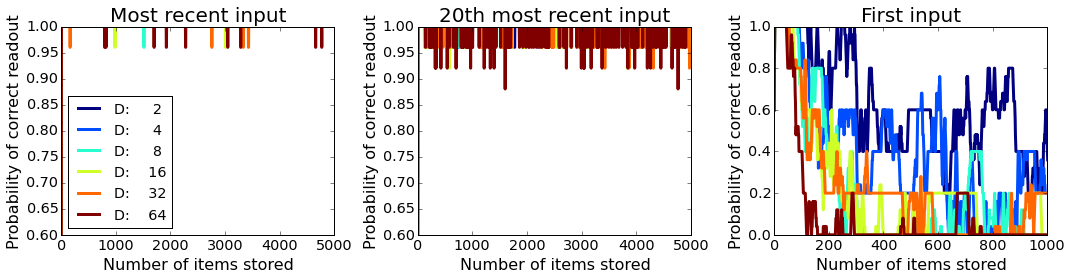

In [5]:
figure(figsize=(15,4))

subplot(131)
cm=get_cmap('jet', li_mean.shape[1])

for i in range(li_mean.shape[1]):
    #plot(li_mean[:,i], color=cm(i))
    smoothN = 5
    plot(np.convolve(li_mean[:,i], np.ones(smoothN)/smoothN, mode='same')[:-smoothN//2], color=cm(i), lw=3, label="D: %5i" % test_D[i])
    
legend(loc='lower left');
title('Most recent input', fontsize=20);
xlabel('Number of items stored', fontsize=16);
ylabel('Probability of correct readout', fontsize=16)


subplot(132)
cm=get_cmap('jet', iK_mean.shape[1])

for i in range(iK_mean.shape[1]):
    #plot(li_mean[:,i], color=cm(i))
    smoothN = 5
    plot(np.convolve(iK_mean[:,i], np.ones(smoothN)/smoothN, mode='same')[:-22],
         color=cm(i), lw=3, label="D: %5i" % test_D[i])
    
#legend(loc='lower left');
title('%dth most recent input' % K, fontsize=20);
xlabel('Number of items stored', fontsize=16);
ylabel('Probability of correct readout', fontsize=16)

subplot(133)
cm=get_cmap('jet', li_mean.shape[1])

for i in range(fi_mean.shape[1]):
    #plot(li_mean[:,i], color=cm(i))
    smoothN = 5
    plot(np.convolve(fi_mean[:,i], np.ones(smoothN)/smoothN, mode='same'), color=cm(i), lw=3, label="D: %5i" % test_D[i])
    
#legend(loc='lower left');
title('First input', fontsize=20);
xlabel('Number of items stored', fontsize=16);
ylabel('Probability of correct readout', fontsize=16)
xlim([0, 1000])

plt.tight_layout()

savefig('figures/decay_net_sim-n' + time.strftime('%y%m%d') + '.png', format='png', transparent=True)
savefig('figures/decay_net_sim-n' + time.strftime('%y%m%d') + '.eps', format='eps', transparent=True)

**Figure 5.1: Hypervector with decay can store most recent input indefinitely.** The Hyper-RNN was decayed by 1% each timestep, which exponentially decays away the past information. This prevents the hypervector from building up into dynamics dominated by chaos, and thus retains the recent information. Thus the most recent input can be read out regardless of the length of the sequence history being stored.

With a hypervector that has a decay rate, the most recent input can be decoded no matter how much input history the hypervector has. Because of the decay, the distant past input fades out, and the chaos due to these inputs also fades away, leaving room in the hypervector for new input.


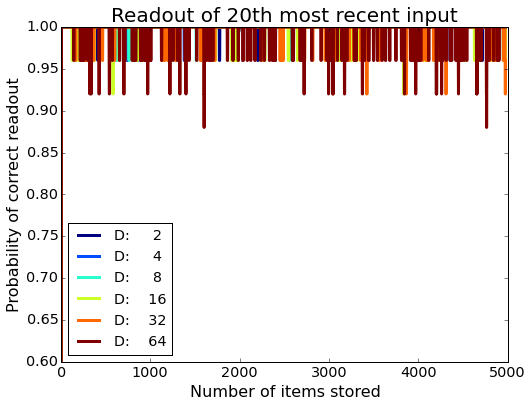

In [6]:
figure(figsize=(8,6))

cm=get_cmap('jet', iK_mean.shape[1])

for i in range(iK_mean.shape[1]):
    #plot(li_mean[:,i], color=cm(i))
    smoothN = 5
    plot(np.convolve(iK_mean[:,i], np.ones(smoothN)/smoothN, mode='same')[:-22],
         color=cm(i), lw=3, label="D: %5i" % test_D[i])
    
legend(loc='lower left');
title('Readout of %dth most recent input' % K, fontsize=20);
xlabel('Number of items stored', fontsize=16);
ylabel('Probability of correct readout', fontsize=16)


**Figure 5.2. Hypervector with decay can store 20th most recent input indefinitely:** The input 20 timesteps backwards can also be recoverred indefinitely.

If we look at the 20th most recent input, we can still virtually always decode this input accurately. 

(0, 1000)

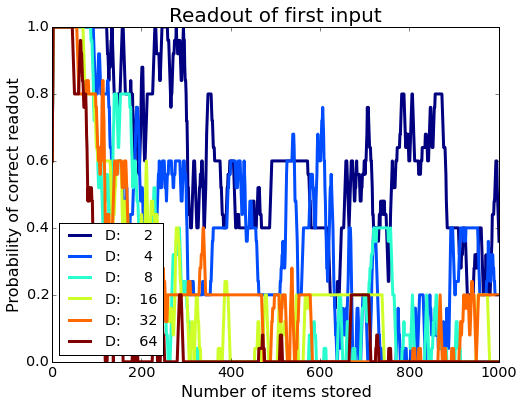

In [7]:
figure(figsize=(8,6))

cm=get_cmap('jet', li_mean.shape[1])

for i in range(fi_mean.shape[1]):
    #plot(li_mean[:,i], color=cm(i))
    smoothN = 5
    plot(np.convolve(fi_mean[:,i], np.ones(smoothN)/smoothN, mode='same'), color=cm(i), lw=3, label="D: %5i" % test_D[i])
    
legend(loc='lower left');
title('Readout of first input', fontsize=20);
xlabel('Number of items stored', fontsize=16);
ylabel('Probability of correct readout', fontsize=16)
xlim([0, 1000])

**Figure 5.3. Decoding the first input still fades:** The initial input information fades away, but this is due to the decay of the activity in the hypervector.

The very initial input into the hypervector will fade away due to the exponential decay. 

We are going to change the test function to build up the hypervector with lots of data and then go backwards through the history from the end to test how far back the hypervector can remember.


In [3]:
def test_capacity_decay_lookback(N, D, decay=1, trials=25e3):
    letter_vectors = 2 * (np.random.randn(D, N) > 0) - 1

    hypercapacity = np.zeros(N)

    tstart = time.time()
    lidx = np.zeros(trials)
    lidx[0] = np.random.randint(D)
    hypercapacity = letter_vectors[lidx[0], :]

    lidx_last_input = np.zeros(trials)
    lidx_input_K = np.zeros(trials)
    lidx_first_input = np.zeros(trials)

    for i in range(int(trials)-1):
        
        lidx[i+1] = np.random.randint(D)

        hypercapacity = decay * np.roll(hypercapacity, 1) + letter_vectors[lidx[i+1], :]

        v_last_input = np.roll(hypercapacity, -1)
        #v_input_K = np.roll(hypercapacity, -K) # we can still do this less than K, it will just be noise
        v_first_input = np.roll(hypercapacity, -(i+1))
        
        lidx_last_input[i] = argmax(np.dot(letter_vectors, v_last_input.T))
        #lidx_input_K[i] = argmax(np.dot(letter_vectors, v_input_K.T))
        lidx_first_input[i] = argmax(np.dot(letter_vectors, v_first_input.T))
        
    # instead of keeping a single K, going to look back with increasing K at the end
    for i in range(int(trials)):
        v_input_K = np.roll(hypercapacity, -(int(trials)-i-1))
        lidx_input_K[i] = argmax(np.dot(letter_vectors, v_input_K.T))

    print 'Duration: ', time.time() - tstart
    
    return lidx, lidx_last_input, lidx_input_K, lidx_first_input

In [5]:
import scipy
def ncdf(z):
    return 0.5 * (1 + scipy.special.erf(z/2**0.5))

def p_correct_decay(M,ll=1, N=10000, D=27, ares=2000):
    M = np.array(M)
    p = np.zeros((ares-1, len(M)))
    
    dM = (1 / (1 - ll**2))
    
    for iM,Mval in enumerate(M):
        avals = np.linspace(N * ll ** Mval - 8 * (N*dM)**0.5, N * ll ** Mval + 8 * (N*dM)**0.5, ares)
        
        p[:, iM] = ncdf((avals[1:]-N * ll ** Mval) / ((dM)*N)**0.5) - ncdf((avals[:-1]-N * ll ** Mval) / ((dM)*N)**0.5)
        p[:, iM] *= (ncdf(np.mean(np.vstack((avals[1:], avals[:-1])), axis=0)/(dM*N)**0.5)) ** (D-1)

    return np.sum(p, axis=0)

In [95]:
test_N = [5000]
test_D = [2, 8, 32]

#test_N = [100, 300, 900, 2700, 8100, 24300]
runs = 5

run_id = []
run_N = []
run_D = []
lidx_all = []
lidx_li_all = []
lidx_iK_all = []
lidx_fi_all = []



for r in range(runs):
    print r
    for N in test_N:
        decay=1-exp(1/2)*25/N
        for D in test_D:
            lidx, lidx_li, lidx_iK, lidx_fi = test_capacity_decay_lookback(N, D, decay=decay)
        
            run_id.append(r)
            run_N.append(N)
            run_D.append(D)
            lidx_all.append(lidx)
            lidx_li_all.append(lidx_li)
            lidx_iK_all.append(lidx_iK)
            lidx_fi_all.append(lidx_fi)
        



0


/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: Depre

Duration:  3.88972496986
Duration:  6.38511300087
Duration:  22.4093999863
1
Duration:  3.80776286125
Duration:  6.95847702026
Duration:  23.0308802128
2
Duration:  3.8817448616
Duration:  7.75868701935
Duration:  22.8001658916
3
Duration:  3.8562130928
Duration:  6.88158392906
Duration:  22.5451979637
4
Duration:  3.80162906647
Duration:  6.8386259079
Duration:  21.264480114


In [96]:
filename = ("data/hypervector_capacity_decay-d=%0.4f-N=" % decay + str(len(test_N)) + '-D=' + str(len(test_D))
            + '-r=' + str(runs) + '-n' + time.strftime('%y%m%d') + '.npz'  )
print filename
np.savez(filename, lidx_all=lidx_all, lidx_li_all=lidx_li_all, lidx_iK_all=lidx_iK_all, lidx_fi_all=lidx_fi_all,
        run_id=run_id, run_N=run_N, run_D=run_D, runs=runs, test_N=test_N, test_D=test_D, decay=decay)

data/hypervector_capacity_decay-d=0.9864-N=1-D=3-r=5-n160608.npz


In [123]:
ls data/hypervector_capacity_decay*.npz

data/hypervector_capacity_decay-d=00-N=1-D=3-r=5-n160518.npz
data/hypervector_capacity_decay-d=%02d-N=1-D=3-r=5-n160518.npz
data/hypervector_capacity_decay-d=0.9864-N=1-D=3-r=5-n160608.npz
data/hypervector_capacity_decay-d=0.994563436343-N=1-D=6-r=5-n160518.npz
data/hypervector_capacity_decay-d=0.995-N=1-D=3-r=5-n160518.npz
data/hypervector_capacity_decay-d=0.995-N=1-D=3-r=5-n160608.npz
data/hypervector_capacity_decay-d=0.995-N=1-D=7-r=5-n160420.npz
data/hypervector_capacity_decay-d=0.998640859086-N=1-D=7-r=5-n160518.npz
data/hypervector_capacity_decay-d=0.998-N=1-D=3-r=5-n160518.npz
data/hypervector_capacity_decay-d=0.999-N=1-D=3-r=5-n160608.npz
data/hypervector_capacity_decay-d=0.99-N=1-D=3-r=5-n160518.npz
data/hypervector_capacity_decay-N=1-D=5-r=5-n160331.npz
data/hypervector_capacity_decay-N=1-D=6-r=5-n160330.npz
data/hypervector_capacity_decay-N=1-D=6-r=5-n160331.npz
data/hypervector_capacity_decay-N=1-D=6-r=5-n160402.npz
data/hypervector_capacity_decay-N=1-D=6-r=5-n160418.npz
da

In [5]:
#h = np.load('data/hypervector_capacity_decay-d=0.998-N=1-D=3-r=5-n160518.npz')
h = np.load('data/hypervector_capacity_decay-d=0.995-N=1-D=3-r=5-n160608.npz')
lidx_all = h['lidx_all']
lidx_li_all = h['lidx_li_all']
lidx_iK_all = h['lidx_iK_all']
lidx_fi_all = h['lidx_fi_all']
run_id = h['run_id']
run_N = h['run_N']
run_D = h['run_D']
runs = h['runs']
test_N = h['test_N']
test_D = h['test_D']
decay=h['decay']
#K = h['K']

In [6]:
N = test_N[0]

In [7]:
run_id = np.array(run_id)
run_D = np.array(run_D)

uD = unique(run_D)

li_mean = np.zeros((lidx_li_all[0].shape[0], len(uD)))
iK_mean = np.zeros((lidx_iK_all[0].shape[0], len(uD)))
fi_mean = np.zeros((lidx_fi_all[0].shape[0], len(uD)))

for iD, idxD in enumerate(uD):
    idxs = find(run_D==idxD)
    for i in idxs:
        li_mean[:,iD] += np.array(lidx_all[i] == lidx_li_all[i], 'int32')
        #iK_mean[:,iD] += np.array(lidx_all[i] == roll(lidx_iK_all[i], -K+1), 'int32')                             
        iK_mean[:,iD] += np.array(lidx_all[i] == lidx_iK_all[i], 'int32')                             
        fi_mean[:,iD] += np.array(lidx_all[i][0] == lidx_fi_all[i], 'int32')
    
li_mean = li_mean / runs
iK_mean = iK_mean / runs
fi_mean = fi_mean / runs


NameError: name 'p_correct_decay' is not defined

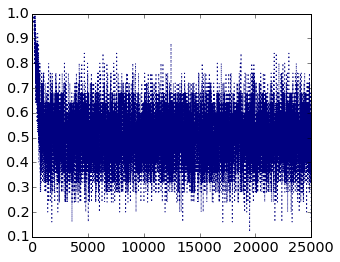

In [8]:
figure(figsize=(5,4))

cm=get_cmap('jet', iK_mean.shape[1])
smoothN=5
for i in range(iK_mean.shape[1]):
    #plot(li_mean[:,i], color=cm(i))
    plot(arange(iK_mean.shape[0], 0, -1)[:-5],
         np.convolve(iK_mean[:,i], np.ones(smoothN)/smoothN, mode='same')[:-5], ':', color=cm(i), lw=1, label="D: %5i" % test_D[i])
    
    pcd = p_correct_decay(arange(iK_mean.shape[0])+1, ll=decay, N=N, D=test_D[i]) 
    plot(arange(iK_mean.shape[0]), pcd, lw=3, color=cm(i))
    
legend(loc='upper right');
title(r'Readout from end, $\lambda=%0.4f$' % decay, fontsize=20);
xlabel('Lookback (t)', fontsize=16);
ylabel('Probability of correct readout', fontsize=16)
xlim([0, 800])

savefig('figures/decay_net_lookback_theory-d%04f' % decay + '-n' + time.strftime('%y%m%d') + '.png', format='png', transparent=True)
savefig('figures/decay_net_lookback_theory-d%04f' % decay + '-n' + time.strftime('%y%m%d') + '.eps', format='eps', transparent=True)

In [10]:
pc = 0.99
D = 27
N = 10000

snr_mi = pc * D * 2 ** pc - 1

ll_max = 1 - snr_mi ** 2 * exp(0.5) / N

print 'snr_mi', snr_mi
print 'll_max', ll_max

snr_mi 52.0907248061
ll_max 0.552628780199


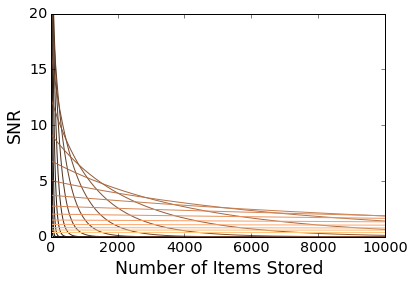

In [14]:
test_ll = 1 - np.logspace(-1, -6, 20)
t = linspace(1, 10000, 1000)
N = 1e5
cm = get_cmap('copper', len(test_ll))
for il,ll in enumerate(test_ll):
    plot(t, ll**t * np.sqrt(N * (1 - ll**2)), color=cm(il))
ylim([0, 20])
xlabel('Number of Items Stored')
ylabel('SNR')

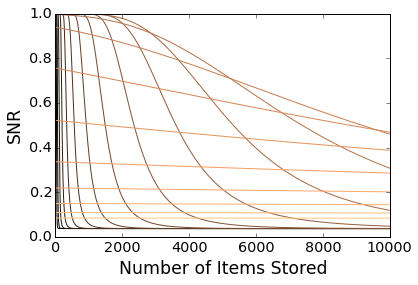

In [16]:
test_ll = 1 - np.logspace(-1, -6, 20)
t = linspace(1, 10000, 1000)
N = 1e5
cm = get_cmap('copper', len(test_ll))
for il,ll in enumerate(test_ll):
    plot(t, p_correct_decay(t, N=N, ll=ll), color=cm(il))
xlabel('Number of Items Stored')
ylabel('SNR')

In [ ]:
test_ll = 1 - np.logspace(-3, -5, 20)
#t = linspace(1, 100000, 100000)
t = arange(100000)+1
N = 1e4
cm = get_cmap('copper', len(test_ll))
test_D = [8, 128, 4096]

figure(figsize=(15,4))

for iD, D in enumerate(test_D):
    subplot(1, len(test_D), iD+1)
    for il,ll in enumerate(test_ll):
        plot(t, cumsum(p_correct_decay(t, N=N, ll=ll, D=D) * log2(p_correct_decay(t, N=N, ll=ll, D=D) * D)), color=cm(il))
    
    title('$D = %i$' % D)
    xlabel('Items Stored')
    ylabel('Bits Read')
    
plt.tight_layout()

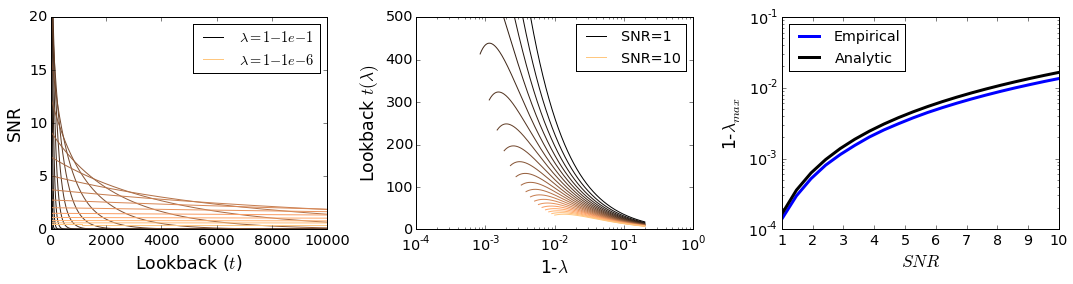

In [139]:

figure(figsize=(15,4))


subplot(131)

test_ll = 1 - np.logspace(-1, -6, 20)
t = linspace(1, 10000, 1000)
N = 1e5
cm = get_cmap('copper', len(test_ll))
for il,ll in enumerate(test_ll):
    
    if (il == 0) or (il==len(test_ll)-1):
        plot(t, ll**t * np.sqrt(N * (1 - ll**2)), color=cm(il), label=r'$\lambda=1-1e%0.0f$' % log10(1-ll))
    else:        
        plot(t, ll**t * np.sqrt(N * (1 - ll**2)), color=cm(il))
    
    
ylim([0, 20])
xlabel('Lookback ($t$)')
ylabel('SNR')
legend(loc='upper right')


test_snr = linspace(1, 10, 20)

eps_max = np.zeros_like(test_snr)

N = 1e4

subplot(132)

cm = get_cmap('copper', len(test_snr))
for isnr,snr in enumerate(test_snr):
    lmbd = 1-np.linspace(snr**2 / N, 0.2, 10000)
    
    #tt = np.log(N * snr / (eps)) / np.log(1-eps)
    tt = np.log(snr / np.sqrt(N*(1-lmbd**2))) / np.log(lmbd)
    
    if (isnr == 0) or (isnr==len(test_snr)-1):
        plot(1-lmbd, tt, color=cm(isnr), label='SNR=%d' % snr)
    else:
        plot(1-lmbd, tt, color=cm(isnr))
    
    eps_max[isnr] = 1-lmbd[argmax(tt)]

#ylim([0, 500])
xscale('log')
#yscale('log')
ylim([1, 500])
xlabel('1-$\lambda$')
ylabel('Lookback $t(\lambda)$')
legend(loc='upper right')

subplot(133)
plot(test_snr, eps_max, lw=3, label='Empirical')
plot(test_snr, test_snr**2 / N*exp(0.5), 'k', lw=3, label='Analytic')
yscale('log')
ylabel('1-$\lambda_{max}$')
xlabel('$SNR$')
legend(loc='upper left')


plt.tight_layout()


savefig('figures/decay_net_curves-n' + time.strftime('%y%m%d') + '.png', format='png', transparent=True)
savefig('figures/decay_net_curves-n' + time.strftime('%y%m%d') + '.eps', format='eps', transparent=True)

(0, 500)

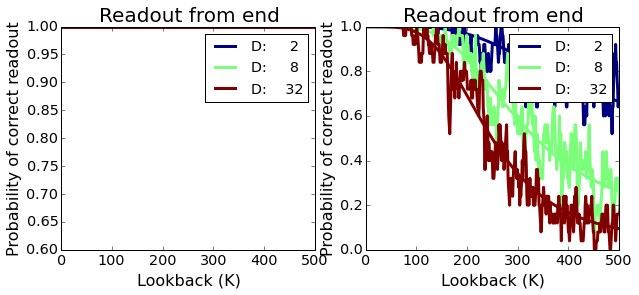

In [81]:
figure(figsize=(10,4))

subplot(121)
cm=get_cmap('jet', iK_mean.shape[1])
smoothN=5
for i in range(li_mean.shape[1]):
    #plot(li_mean[:,i], color=cm(i))
    plot(arange(li_mean.shape[0], 0, -1)[:-5],
         np.convolve(li_mean[:,i], np.ones(smoothN)/smoothN, mode='same')[:-5], color=cm(i), lw=3, label="D: %5i" % test_D[i])
    
    pcd = p_correct_decay(ones(li_mean.shape[0]), ll=decay, N=N, D=test_D[i]) 
    plot(arange(li_mean.shape[0]), pcd, lw=3, color=cm(i))
    
legend(loc='upper right');
title('Readout from end', fontsize=20);
xlabel('Lookback (K)', fontsize=16);
ylabel('Probability of correct readout', fontsize=16)
xlim([0, 500])

subplot(122)
cm=get_cmap('jet', iK_mean.shape[1])
smoothN=5
for i in range(iK_mean.shape[1]):
    #plot(li_mean[:,i], color=cm(i))
    plot(arange(iK_mean.shape[0], 0, -1)[:-5],
         np.convolve(iK_mean[:,i], np.ones(smoothN)/smoothN, mode='same')[:-5], color=cm(i), lw=3, label="D: %5i" % test_D[i])
    
    pcd = p_correct_decay(arange(iK_mean.shape[0])+1, ll=decay, N=N, D=test_D[i]) 
    plot(arange(iK_mean.shape[0]), pcd, lw=3, color=cm(i))
    
legend(loc='upper right');
title('Readout from end', fontsize=20);
xlabel('Lookback (K)', fontsize=16);
ylabel('Probability of correct readout', fontsize=16)
xlim([0, 500])

In [78]:
pcd[1]

0.99998514601452781

In [37]:
s = 2
N = 2000
t_star = 0.5 / (-np.log(1 - s**2 * exp(1)/N))
eps_star = s **2 *exp(1)/N
print t_star, eps_star


91.7196331515 0.00543656365692


In [ ]:
dM = 1 / (eps_star)



**Figure 5.4. Recent input can be retained indefinitely in decay HyperRNN:** After streaming a large number of inputs into a decayed HyperRNN, we decoded the recent history from the hypervector and compared it to the actual input. A large history of recent input can be retained, which falls off exponentially. 


(0, 500)

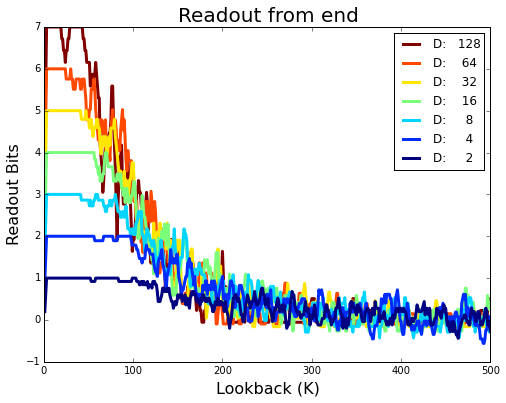

In [20]:
figure(figsize=(8,6))

cm=get_cmap('jet', iK_mean.shape[1])
smoothN=5
for i in range(iK_mean.shape[1])[::-1]:
    #plot(li_mean[:,i], color=cm(i))
    plot(arange(iK_mean.shape[0], 0, -1), 
         1.0/(1.0-1.0/test_D[i])*np.log2(test_D[i]) * (np.convolve(iK_mean[:,i], np.ones(smoothN)/smoothN, mode='same') - 1.0 / test_D[i]), color=cm(i), lw=3, label="D: %5i" % test_D[i])
    
legend(loc='upper right');
title('Readout from end', fontsize=20);
xlabel('Lookback (K)', fontsize=16);
ylabel('Readout Bits', fontsize=16)
xlim([0, 500])

**Figur 5.5 Hypervector retains a certain amount of bits:** The probability of correct was transformed into the amount of bits read out. Using more tokens in the hypervector with decay means less tokens can be stored over time, but the same number of bits are store becuase there are more bits per token.


### 5.2 Ideal Decay for N

Because as the hypervector fills up there is less information per token, there could be an ideal decay parameter that fills up the hypervector to just under its capacity.

In [7]:
def ncdf(z):
    return 0.5 * (1 + scipy.special.erf(z/2**0.5))

def p_correct_l(M, N=10000, D=27, ares=2000):
    M = np.array(M)
    p = np.zeros((ares-1, len(M)))

    for iM,Mval in enumerate(M):
        avals = np.linspace(N - 8 * (N*Mval)**0.5, N + 8 * (N*Mval)**0.5, ares)
        
        p[:, iM] = ncdf((avals[1:]-N) / ((Mval-1)*N)**0.5) - ncdf((avals[:-1]-N) / ((Mval-1)*N)**0.5)
        p[:, iM] *= (ncdf(np.mean(np.vstack((avals[1:], avals[:-1])), axis=0)/(Mval*N)**0.5)) ** (D-1)

    return np.sum(p, axis=0)

(0, 1.05)

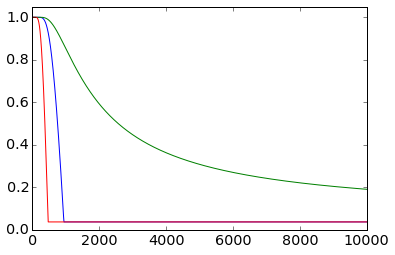

In [21]:
N = 10000
M = arange(10000)+1
D = 27

pc = 1 - 0.5 * D * exp(-N/(4*M))
pc2 = 1 - 0.5 * D * exp(-N/(8*M))
pc[pc < 1/D] = 1/D
pc2[pc2 < 1/D] = 1/D

pcorr = p_correct_l(M, N=N,D=D)

plot(M, pc)
plot(M, pcorr)
plot(M, pc2)
ylim([0, 1.05])

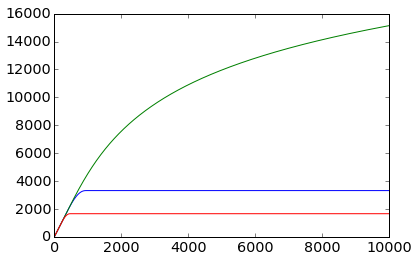

In [22]:

plot(cumsum(pc * np.log2(pc*D)))
plot(cumsum(pcorr * np.log2(pcorr*D)))
plot(cumsum(pc2 * np.log2(pc2*D)))

(0, 1.05)

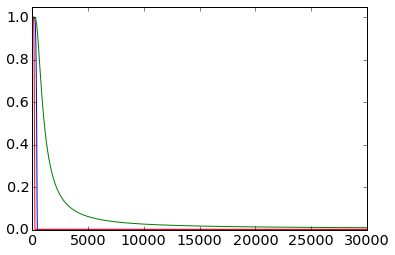

In [32]:
N = 10000
M = arange(30000)+1
D = 512

pc = 1 - 0.5 * D * exp(-N/(4*M))
pc2 = 1 - 0.5 * D * exp(-N/(8*M))
pc[pc < 1/D] = 1/D
pc2[pc2 < 1/D] = 1/D

pcorr = p_correct_l(M, N=N,D=D)

plot(M, pc)
plot(M, pcorr)
plot(M, pc2)
ylim([0, 1.05])

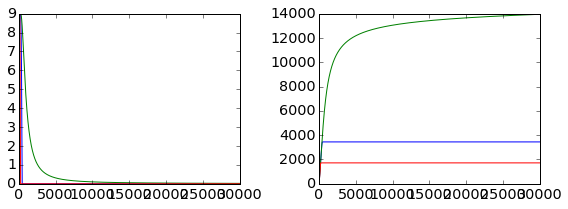

In [33]:
figure(figsize=(8,3))
subplot(121)
plot(pc * np.log2(pc*D))
plot(pcorr * np.log2(pcorr*D))
plot(pc2 * np.log2(pc2*D))
subplot(122)
plot(cumsum(pc * np.log2(pc*D)))
plot(cumsum(pcorr * np.log2(pcorr*D)))
plot(cumsum(pc2 * np.log2(pc2*D)))

plt.tight_layout()